<a href="https://colab.research.google.com/github/AnanyaGodse/DJS-Compute-Tasks/blob/main/Task%204/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


In [ ]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [ ]:
df = pd.read_csv("Data1.txt", header=None)
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df.columns = ['Population', 'Profit']
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
df.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [ ]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
df.shape

(97, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Scatter plot of Population vs Profit

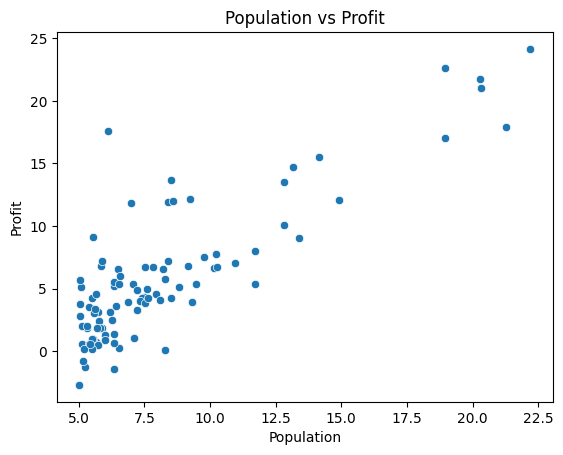

In [ ]:
sns.scatterplot(data=df, x="Population", y="Profit").set(title="Population vs Profit")
plt.show()

### Function to compute the cost function

In [ ]:
### Function to compute the cost function

In [ ]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [ ]:
df.insert(0,"ones", 1)
df

,ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


### Set training data (X) and target variable (y)

In [ ]:
X = df[{df.columns[0], df.columns[1]}]
X

<ipython-input-14-e15c8c1ff567>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[{df.columns[0], df.columns[1]}]


,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [ ]:
y = df[df.columns[2]]
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [ ]:
X = np.matrix(X)
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [ ]:
y = np.array(y)
y = y[:,np.newaxis]
y = np.matrix(y)
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [ ]:
theta = np.array([0, 0])

In [ ]:
theta = np.matrix(theta)
theta

matrix([[0, 0]])

In [ ]:
initial_cost = computeCost(X, y, theta)
initial_cost

32.072733877455676

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [ ]:
alpha = 0.01
iters = 1000

In [ ]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [ ]:
minimized_cost = computeCost(X, y, g)
minimized_cost

4.515955503078914




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

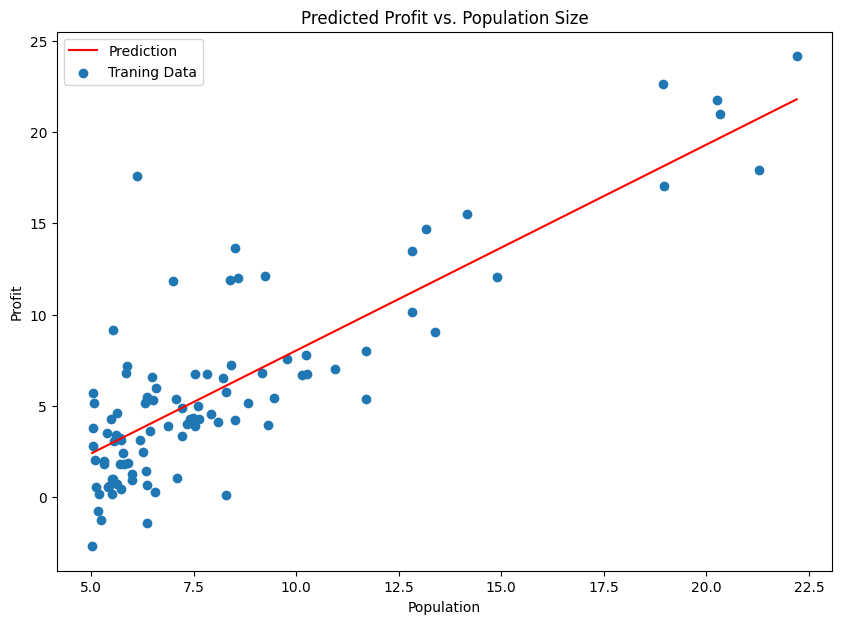

In [ ]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

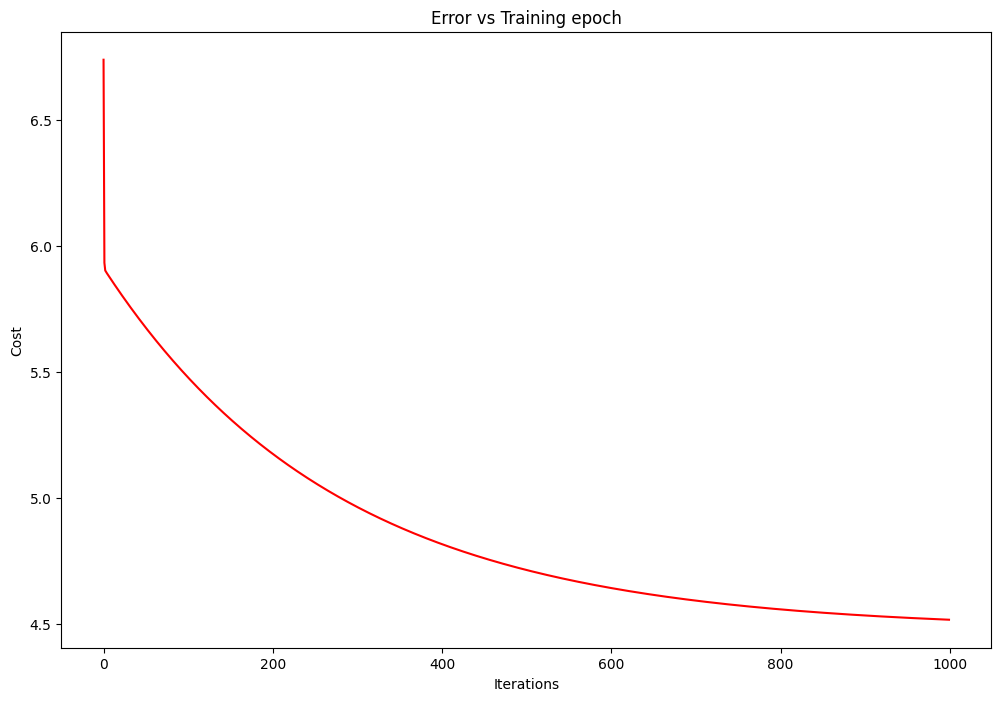

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [ ]:
X1 = df[['Population']]
y1 = df['Profit']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [ ]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
predictions = model.predict(X1_test)
predictions

array([22.71512997,  7.1671497 ,  2.63107213,  6.02691083,  6.83373654,
        2.23217145, 11.29200958,  2.10839151,  2.6252185 , 11.97249438,
        2.5989991 ,  3.08972865, 20.35782329,  5.65191248,  2.78448609,
        1.8215635 ,  4.83374535,  2.19863501, 13.81882771,  4.69191671])

In [ ]:
#R-squared - values between 0 and 1, value closer to 1 implies a better match between model & data.
R2_score = r2_score(y1_test, predictions)
R2_score

0.6159910691851631

In [ ]:
#Mean Squared Error - the better the model fits the data, the less the MSE score.
MSE_score = mean_squared_error(y1_test, predictions)
MSE_score

16.531797042896212

In [ ]:
#Root Mean Squared Error
RMSE_score = np.sqrt(mean_squared_error(y1_test, predictions))
RMSE_score

4.065931263916818

In [ ]:
#Mean Absolute Error
MAE_score = mean_absolute_error(y1_test, predictions)
MAE_score

2.486050394029891